# AI 사례실습과 함께하는 '드래곤볼'을 찾아서, 모델평가!
* 드래곤볼 7개를 모으면 3가지 선물이 주어진다고 합니다.
* AI 모델링 A부터 Z까지의 각 과정에 드래곤볼이 숨겨져있다고 하는데요.
* 우리는 이제 다섯 번째 마을 '모델평가' 마을에 도착했습니다.
* 그럼, 지금부터 다섯 번째 드래곤볼을 찾아볼까요?

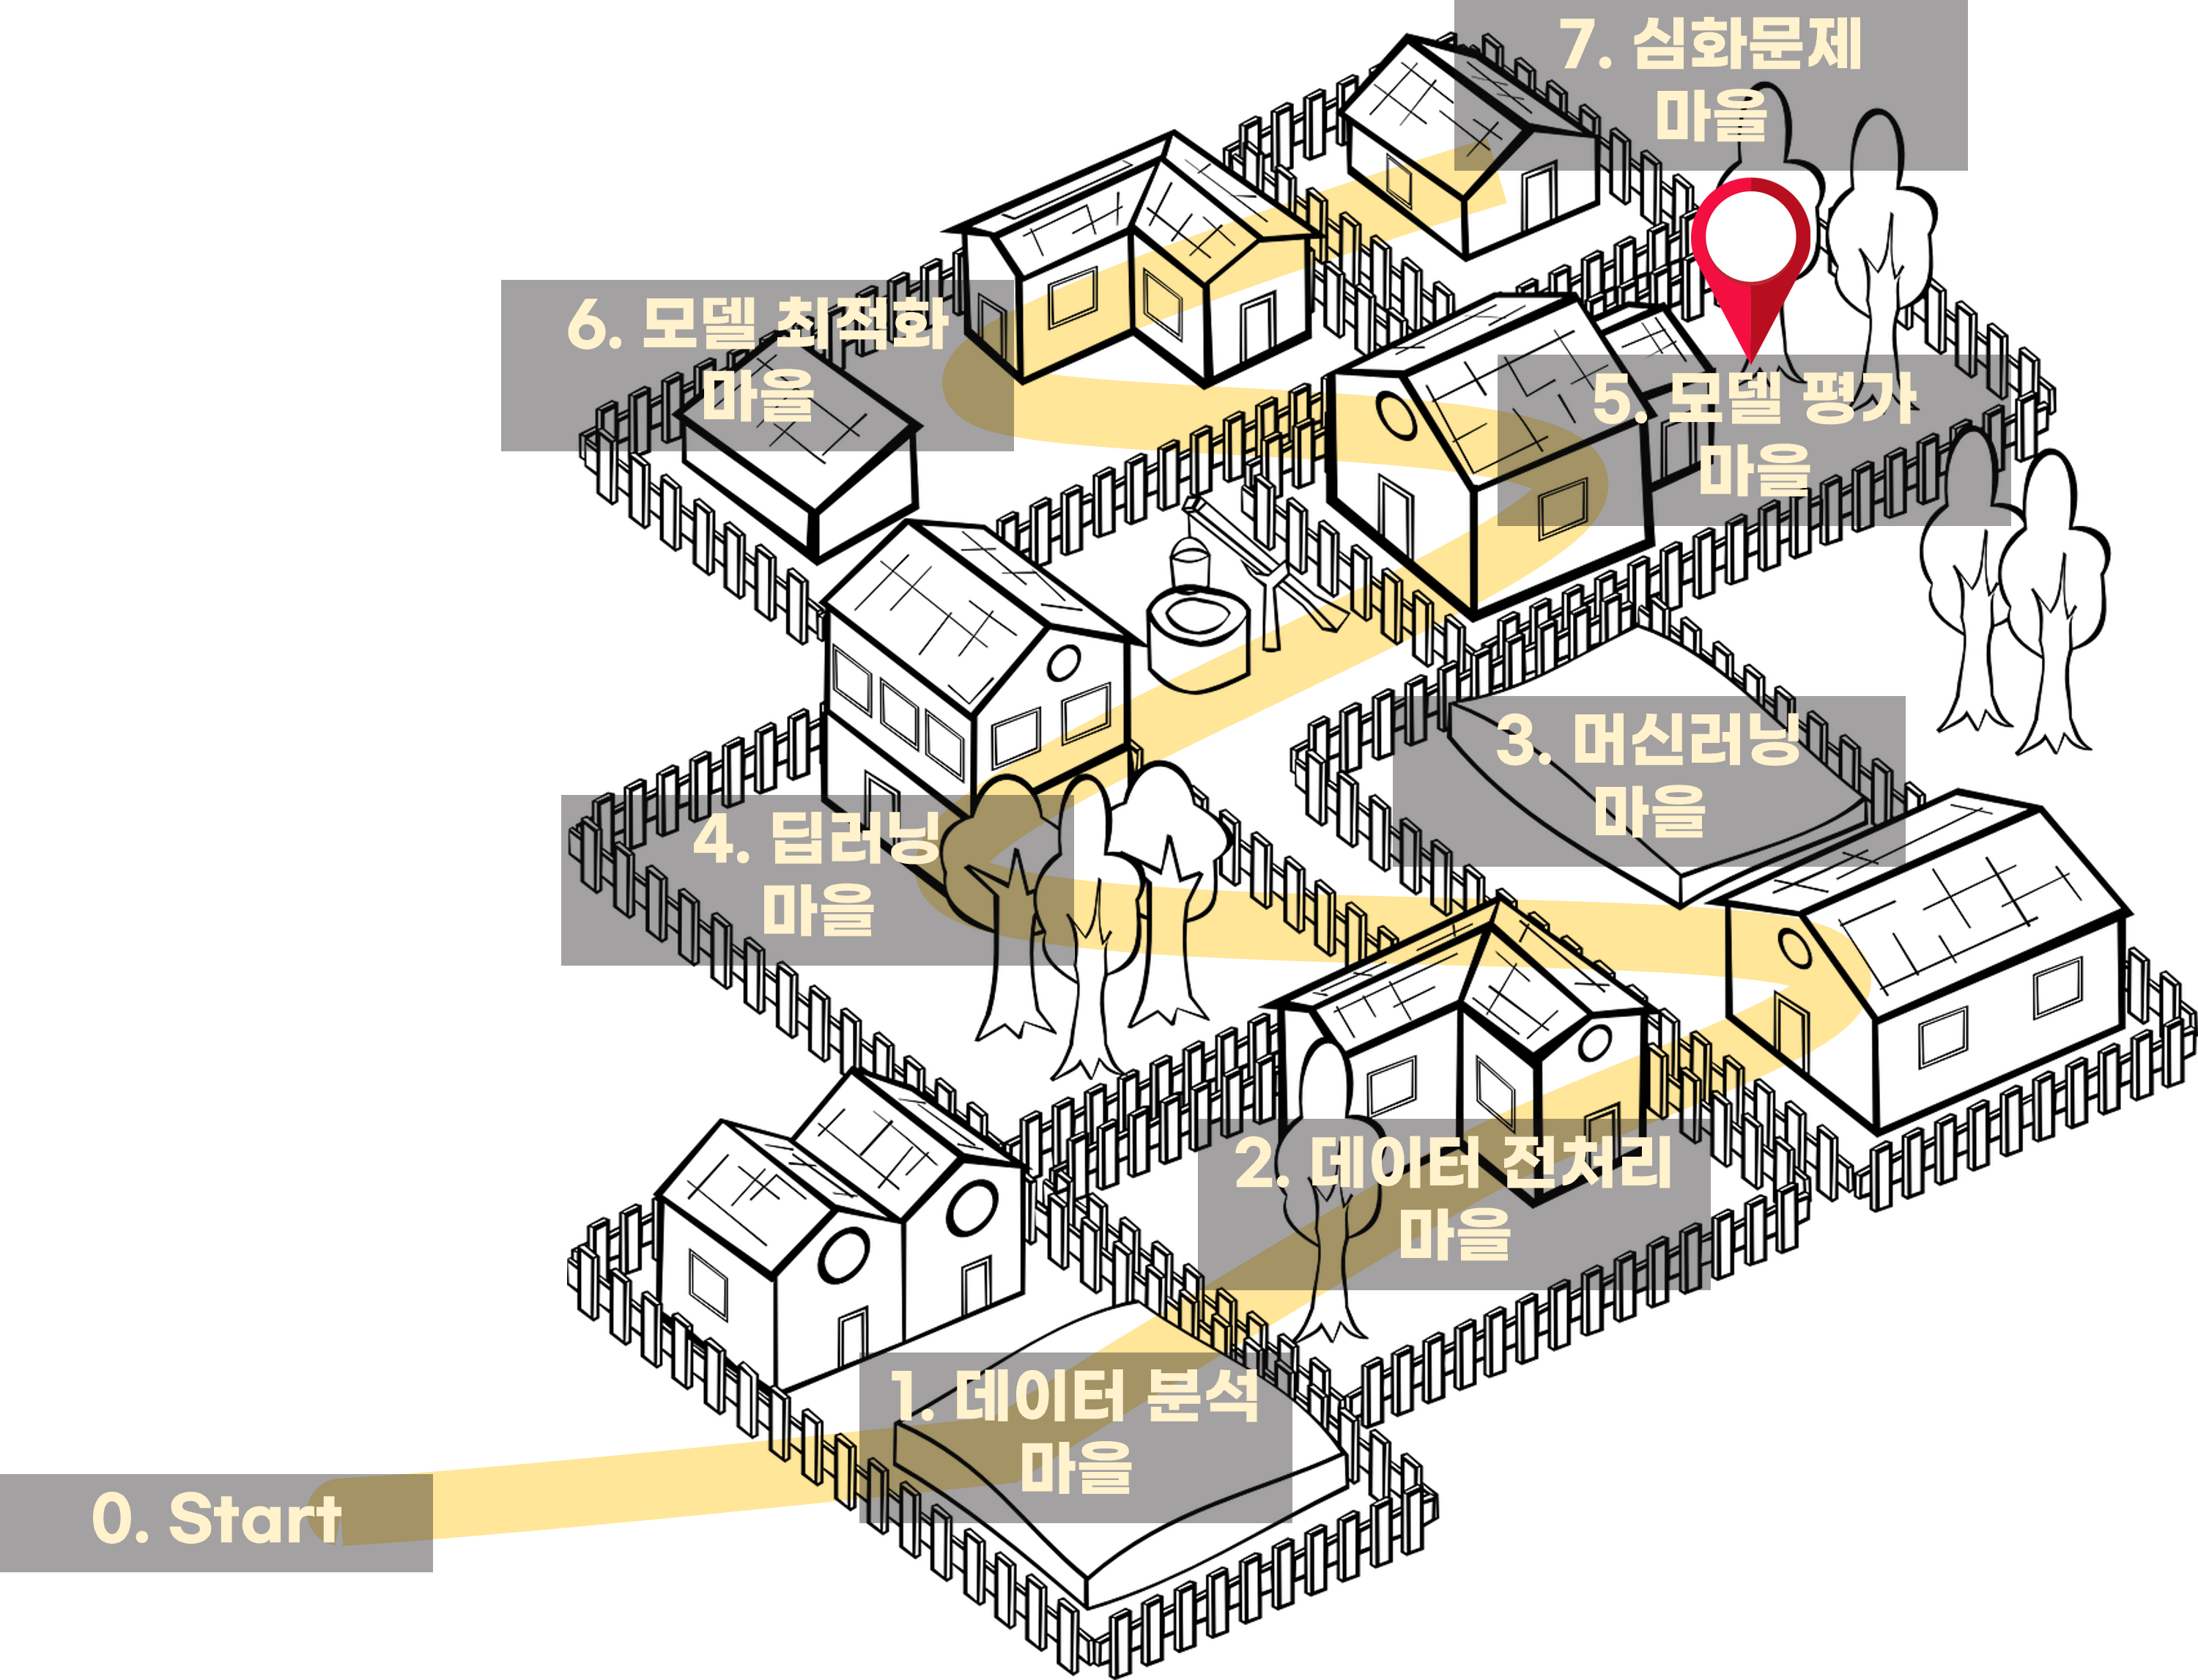

### [상황] 다섯 번째 드래곤볼을 찾아 보겠습니다. 
* 실습문제를 해결할 때마다 단서가 주어지는데요. 
* 이 단서를 기억해두었다가 마지막에 드래곤볼을 찾을 때 활용하시면 되요.

---

In [ ]:
# 필요 라이브러리부터 설치할께요.
!pip install pandas requests seaborn xgboost gspread oauth2client

In [ ]:
# ID를 입력해주세요.
ID = "finalTest"

---

# (실습준비) 데이터 불러오기부터

In [1]:
import pandas as pd

# 학습/평가 데이터 로딩
df_evaluation_target = pd.read_csv("add_data/onenavi_evaluation_et.csv",sep="|")
df_evaluation_feature = pd.read_csv("add_data/onenavi_evaluation_feature.csv",sep="|")

In [5]:
#df_evaluation_target.shape
df_evaluation_feature.shape


(53742, 108)

# 1. 저장된 모델 불러오기

#### [실습문제1] 모델 불러오기
* 앞선 실습에서 저장한 모델을 불러와서 model_rslt 저장해주세요.
* 모델을 담을 빈 리스트 model_result를 생성하세요.
* model_0.pkl, model_1.pkl, model_2.pkl, model_3.pkl, DeeplearningModel.h5를 model_result에 불러와서 담아주세요.
* 단서 : 머신러닝으로 학습한 파일(pkl)을 불러오는 joblib의 함수명은? Hint : joblib.oooo

In [ ]:
# 아래에 실습코드를 작성하세요.
import tensorflow as tf
import joblib

# 모델을 담을 빈 리스트 생성
model_result = []

# 앞서 저장한 머신러닝 모델 불러오기 및 저장
for i in range(4):
    model_result.append(joblib.load("model/{}_model.pkl".format(i)))
# 앞서 저장한 딥러닝 모델 불러오기 및 저장
model_result.append(tf.keras.models.load_model("model/DeeplearningModel.h5"))

In [ ]:
model_result

In [ ]:
# 아래에 단서를 적어주세요.
단서1 = "load"# 단서1을 적어주세요.(문자형으로 적어주세요.)

#### [실습문제2] 모델 예측 결과 비교하기
* 저장된 모델의 예측결과를 상호 비교해보세요.
* 기준은 ETAA를 계산하고 그 평균으로 비교를 합니다. 이를 위해서 함수 'calculation_etaa'를 활용해주세요.
* 그리고 각 모델이 예측한 ETAA의 표준편차도 구해주세요.(소스코드 실행 후 표를 통해서 확인)
* 각 모델의 평균과 표준편차를 정리해주세요.(소스코드 실행 후 표를 통해서 확인)
* 단서 : XGBoost 모델 예측결과의 표준편차는?(소수점 첫째자리까지)

In [ ]:
# 아래에 실습코드를 작성하세요.'calculation_etaa'함수 정의
def calculation_etaa(et, eta):
    etaa = (1-(abs(et-eta)/et))*100.0
    etaa[(etaa < 0)] = 0
    return etaa

In [ ]:
# 아래에 실습코드를 실행시키세요.
e1_list = ['ETA1', 'ETA2', 'ETA3', 'ETA4', 'ETA5']
e2_list = ['ETAA1', 'ETAA2', 'ETAA3', 'ETAA4', 'ETAA5']

for e1, e2, model in zip(e1_list, e2_list, model_result):
    df_evaluation_target[e1] = model.predict(df_evaluation_feature)
    etaa_value = calculation_etaa(df_evaluation_target['ET'], df_evaluation_target[e1])
    df_evaluation_target[e2] = etaa_value

# mean, min, max, std
etaa = ['ETAA', 'ETAA1', 'ETAA2', 'ETAA3', 'ETAA4', 'ETAA5']
alg = ['DATA', 'ML-LG', 'ML-RFR', 'ML-GBR', 'XBR', 'Deep']

print('+-------------------------------------------------------+')
print('|   ALG    | Mean(%) |    STD    |  MIN(%)  |  MAX(%)   |')
print('+----------+---------+-----------+----------+-----------+')
for i, e in zip(range(len(alg)), etaa):
    eMean = df_evaluation_target[e].mean()
    eStd = df_evaluation_target[e].std()
    eMin = df_evaluation_target[e].min()
    eMax = df_evaluation_target[e].max()
    print('|  {:6s}  |   {:3.1f}  |   {:05.1f}   |   {:4.1f}   |  {:7.1f}  | '.format(alg[i], eMean, eStd, eMin, eMax))
print('+----------+---------+-----------+----------+-----------+\n\n')

In [ ]:
# 각 모델의 ETAA 평균과 표준편차를 정리하세요.
# LinearRegression :
# RandomForestRegressor :
# GradientBoostingRegressor :
# XGBRegressor :
# DeeplearningModel :

In [ ]:
# 아래에 단서를 적어주세요.
단서2 = "16.4"# 단서2를 적어주세요.(문자형으로 적어주세요.)023.3

### 좀 더 상세한 분석을 위해 거리 구간별로 결과를 확인해 보겠습니다.

In [ ]:
etaa = ['ETAA', 'ETAA1', 'ETAA2', 'ETAA3', 'ETAA4', 'ETAA5']
alg = ['DATA', 'ML-LG', 'ML-RFR', 'ML-GBR', 'XBR', 'Deep']

for length in range(4):
    if length == 0:
        print(' 1,000 <= A_DISTANCE < 5,000m')
    elif length == 1:
        print(' 5,000 <= A_DISTANCE < 10,000m')
    elif length == 2:
        print(' 10,000 <= A_DISTANCE < 15,000m')
    else:
         print('All A_DISTANCE')
    print('+-------------------------------------------------------+')
    print('|   ALG    | Mean(%) |    STD    |  MIN(%)  |  MAX(%)   |')
    print('+----------+---------+-----------+----------+-----------+')
    for i, e in zip(range(len(alg)), etaa):
        if length == 0:
            eMean = df_evaluation_target.loc[(df_evaluation_target['A_DISTANCE']>=1000) & (df_evaluation_target['A_DISTANCE']<5000), e].mean()
            eStd = df_evaluation_target.loc[(df_evaluation_target['A_DISTANCE']>=1000) & (df_evaluation_target['A_DISTANCE']<5000), e].std()
            eMin = df_evaluation_target.loc[(df_evaluation_target['A_DISTANCE']>=1000) & (df_evaluation_target['A_DISTANCE']<5000), e].min()
            eMax = df_evaluation_target.loc[(df_evaluation_target['A_DISTANCE']>=1000) & (df_evaluation_target['A_DISTANCE']<5000), e].max()
        elif length == 1:
            eMean = df_evaluation_target.loc[(df_evaluation_target['A_DISTANCE']>=5000) & (df_evaluation_target['A_DISTANCE']<10000), e].mean()
            eStd = df_evaluation_target.loc[(df_evaluation_target['A_DISTANCE']>=5000) & (df_evaluation_target['A_DISTANCE']<10000), e].std()
            eMin = df_evaluation_target.loc[(df_evaluation_target['A_DISTANCE']>=5000) & (df_evaluation_target['A_DISTANCE']<10000), e].min()
            eMax = df_evaluation_target.loc[(df_evaluation_target['A_DISTANCE']>=5000) & (df_evaluation_target['A_DISTANCE']<10000), e].max()
        elif length == 2:
            eMean = df_evaluation_target.loc[(df_evaluation_target['A_DISTANCE']>=10000) & (df_evaluation_target['A_DISTANCE']<15000), e].mean()
            eStd = df_evaluation_target.loc[(df_evaluation_target['A_DISTANCE']>=10000) & (df_evaluation_target['A_DISTANCE']<15000), e].std()
            eMin = df_evaluation_target.loc[(df_evaluation_target['A_DISTANCE']>=10000) & (df_evaluation_target['A_DISTANCE']<15000), e].min()
            eMax = df_evaluation_target.loc[(df_evaluation_target['A_DISTANCE']>=10000) & (df_evaluation_target['A_DISTANCE']<15000), e].max()
        else:
            eMean = df_evaluation_target[e].mean()
            eStd = df_evaluation_target[e].std()
            eMin = df_evaluation_target[e].min()
            eMax = df_evaluation_target[e].max()
        print('|  {:6s}  |   {:3.1f}  |   {:05.1f}   |   {:4.1f}   |  {:7.1f}  |'.format(alg[i], eMean, eStd, eMin, eMax))
    print('+----------+---------+-----------+----------+-----------+\n\n')

### 100개의 샘플로 결과를 시각화를 시도하겠습니다.

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(100, 10))
idx = np.arange(0, 100)
plt.plot(idx, df_evaluation_target.ET[0:100], 'b', marker='s')
plt.plot(idx, df_evaluation_target.ETA1[0:100], 'g', marker='s')
plt.plot(idx, df_evaluation_target.ETA2[0:100], 'r', marker='+')
plt.plot(idx, df_evaluation_target.ETA3[0:100], 'y', marker='*')
plt.plot(idx, df_evaluation_target.ETA4[0:100], 'b', marker='o')
plt.plot(idx, df_evaluation_target.ETA5[0:100], 'b', marker='^')
plt.plot()
plt.xlabel('Index')
plt.ylabel('ET(sec)')
plt.legend(['Real', 'ML-LG', 'ML-RFR', 'ML-GBR', 'XBR', 'Deep'])
plt.show()

---

### [드래곤볼을 찾아라] 주어진 단서를 모아서 드래곤볼을 찾아보겠습니다.
* 소스코드 실행 후 드래곤볼 이미지 창이 열리고 "드래곤볼을 찾았습니다."라는 문구가 출력된다면 여러분은 드래곤볼을 찾은 거랍니다.

In [ ]:
# 단서를 모두 모았다면 드래곤볼을 찾아봅시다! 아래 소스코드를 실행해 주세요.
import module

module.fifthModule(ID, 단서1, 단서2)

In [ ]:
# 확인
from IPython.display import Image
Image("./dragonball/5성구.png", width=300, height=300)